In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest , f_regression
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


%matplotlib inline



## EDA

In [32]:
data = pd.read_csv("SongPopularity.csv")
pd.set_option("display.max_columns",None)
data.head()

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,Spotify URI,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,I Need You,I Need You,1/30/2001,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826,https://open.spotify.com/track/046MBhhgQJJghnb...,https://i.scdn.co/image/ab67616d00001e025cf523...,spotify:track:046MBhhgQJJghnbgZCkaAR,62,0.0200,0.478,0.736,0.000096,0.118,-7.124,0.0367,144.705,0.564,7,1,4
1,Sweet Lady,Tyrese,8/31/1998,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600,https://open.spotify.com/track/1Dx8rIZaXzZPvUQ...,https://i.scdn.co/image/ab67616d00001e0283422e...,spotify:track:1Dx8rIZaXzZPvUQRF2j9hB,63,0.2330,0.588,0.522,0.000000,0.240,-6.254,0.0383,66.024,0.584,9,0,4
2,You Take My Breath Away - Mono Version,Sooner or Later,1979,['Rex Smith'],['bubblegum pop'],1979,86,197453,https://open.spotify.com/track/3BCMsz55asr7Yr6...,https://i.scdn.co/image/ab67616d00001e02d1741c...,spotify:track:3BCMsz55asr7Yr6DqB9N8D,49,0.4760,0.313,0.600,0.000026,0.523,-7.913,0.0357,141.912,0.272,11,1,4
3,If I Give My Heart to You (with The Mellomen),Golden Girl (The Columbia Recordings 1944-1966),1945,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066,https://open.spotify.com/track/20G1XJaTwIm2Iuw...,https://i.scdn.co/image/ab67616d00001e02f2ee02...,spotify:track:20G1XJaTwIm2IuwA3Pjg1d,43,0.9730,0.503,0.059,0.000000,0.103,-16.131,0.0497,76.642,0.331,9,1,4
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,spotify:track:28BSc2ZmO0Oe3iv4mFdedS,0,0.0149,0.843,0.348,0.001280,0.247,-10.669,0.0545,143.595,0.385,7,0,4


In [33]:
X = data.drop(['Popularity'], axis=1)
Y = data["Popularity"]

In [34]:
x_train ,x_test, y_train ,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

## Preprocessing

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6191 non-null   object 
 1   Album                6191 non-null   object 
 2   Album Release Date   6191 non-null   object 
 3   Artist Names         6191 non-null   object 
 4   Artist(s) Genres     6191 non-null   object 
 5   Hot100 Ranking Year  6191 non-null   int64  
 6   Hot100 Rank          6191 non-null   int64  
 7   Song Length(ms)      6191 non-null   int64  
 8   Spotify Link         6191 non-null   object 
 9   Song Image           6191 non-null   object 
 10  Spotify URI          6191 non-null   object 
 11  Popularity           6191 non-null   int64  
 12  Acousticness         6191 non-null   float64
 13  Danceability         6191 non-null   float64
 14  Energy               6191 non-null   float64
 15  Instrumentalness     6191 non-null   f

In [36]:
data.shape

(6191, 24)

In [37]:
data.columns

Index(['Song', 'Album', 'Album Release Date', 'Artist Names',
       'Artist(s) Genres', 'Hot100 Ranking Year', 'Hot100 Rank',
       'Song Length(ms)', 'Spotify Link', 'Song Image', 'Spotify URI',
       'Popularity', 'Acousticness', 'Danceability', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo',
       'Valence', 'Key', 'Mode', 'Time Signature'],
      dtype='object')

In [38]:
x_train.isnull().sum()

Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64

In [39]:
x_train.duplicated().sum()

0

In [40]:
x_train.describe()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
count,4952.000000,4952.000000,4.952000e+03,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000,4952.00000,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000,4952.000000
mean,1988.072092,48.617528,2.257306e+05,0.296524,0.619903,0.598789,0.044924,0.179078,-8.71525,0.072291,118.903913,0.596642,5.265953,0.703554,3.942044
std,20.154920,29.237567,6.542577e+04,0.288974,0.156031,0.204853,0.167428,0.148969,3.80822,0.079931,28.219778,0.241738,3.588417,0.456736,0.303606
min,1946.000000,1.000000,5.180000e+04,0.000004,0.000000,0.012000,0.000000,0.015000,-37.84100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1972.000000,23.000000,1.824520e+05,0.048575,0.524000,0.457000,0.000000,0.086700,-11.14975,0.032375,97.629500,0.406000,2.000000,0.000000,4.000000
50%,1988.000000,48.000000,2.216065e+05,0.193000,0.636000,0.619000,0.000004,0.122000,-8.08250,0.041500,117.776500,0.613000,5.000000,1.000000,4.000000
75%,2005.000000,74.000000,2.578465e+05,0.500250,0.729000,0.759000,0.000463,0.229000,-5.73100,0.069100,134.288500,0.803250,8.000000,1.000000,4.000000
max,2022.000000,100.000000,1.561133e+06,0.995000,0.988000,0.997000,0.971000,0.985000,-0.81000,0.911000,231.025000,0.991000,11.000000,1.000000,5.000000


Extract Year from release date

In [41]:
def extract_year(date_str):
    try:
        return pd.to_datetime(date_str, errors= 'coerce').year
    except:
        return None


x_train['Album Release Date'] = x_train['Album Release Date'].apply(extract_year)


x_train['Album Release Date'] = x_train['Album Release Date'].fillna(x_train['Album Release Date'].loc[x_train['Album Release Date'].notna()].astype(str))

x_train.rename(columns={'Album Release Date': 'Release Year'}, inplace=True)


Categorize The Artist name column

In [42]:
def categorize_names(names_list):
    num_names = len(names_list)
    if num_names == 1:
        return 'single'
    elif num_names == 2:
        return 'duo'
    else:
        return 'band'

# Apply categorization function to create a new column
x_train['ArtistCount'] = x_train['Artist Names'].apply(lambda x: categorize_names(eval(x)))

In [43]:
x_train['ArtistCount'].value_counts()

ArtistCount
single    4184
duo        589
band       179
Name: count, dtype: int64

In [44]:
x_train.drop("Artist Names", axis= 1, inplace= True)

Categorize Genre column

In [45]:
def categorize_genres(genres_list):
    if any('pop' in genre.lower() for genre in genres_list):
        return 'Pop'
    elif any('hip hop' in genre.lower() for genre in genres_list):
        return 'Hip Hop/Rap'
    elif any('country' in genre.lower() for genre in genres_list):
        return 'Country'
    elif any('electropop' in genre.lower() for genre in genres_list):
        return 'Electropop'
    elif any('standards' in genre.lower() for genre in genres_list):
        return 'Adult Standards'
    else:
        return 'Others'
    
# Apply categorization function to create a new column
x_train['Genre'] = x_train['Artist(s) Genres'].apply(lambda x: categorize_genres(eval(x)))


In [46]:
x_train['Genre'].value_counts()

Genre
Others             2106
Pop                2098
Adult Standards     275
Country             271
Hip Hop/Rap         202
Name: count, dtype: int64

In [47]:
categorical = [i for i in x_train.columns if x_train[i].dtypes == "O"]

for feature in  categorical:
    print(x_train[feature].value_counts())
    print("\n \n ")

Song
I Like It                              5
I Wish                                 4
Dance with Me                          4
Stay                                   4
Runaway                                4
                                      ..
Don’t Start Now                        1
Peg O' My Heart                        1
You're All I Need To Get By            1
Moscow Mule                            1
Maria Maria (feat. The Product G&B)    1
Name: count, Length: 4631, dtype: int64

 
 
Album
Greatest Hits                        33
16 Most Requested Songs              10
Super Hits                           10
Celebration (double disc version)     8
Faith                                 8
                                     ..
Sólo Lo Mejor: 20 Exitos              1
King Floyd                            1
The Dude                              1
Boogity Boogity                       1
Rock Around The Clock                 1
Name: count, Length: 3799, dtype: int64

 
 
Artist(s

In [48]:

current_year = datetime.datetime.now().year

# Calculate the age of the song
x_train['Song Age'] = current_year - x_train['Release Year']

In [49]:
x_train.head()

,Song,Album,Release Year,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,Spotify URI,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,ArtistCount,Genre,Song Age
1020,Vogue,Celebration (double disc version),2009,"['dance pop', 'pop']",1990,5,316813,https://open.spotify.com/track/27QvYgBk0CHOVHt...,https://i.scdn.co/image/ab67616d00001e021fc9fd...,spotify:track:27QvYgBk0CHOVHthWnkuWt,0.00379,0.737,0.880,0.003510,0.4170,-6.449,0.0433,115.998,0.329,6,1,4,single,Pop,15
1545,BURN IT DOWN,LIVING THINGS,2012,"['alternative metal', 'nu metal', 'rock', 'pos...",2012,100,230253,https://open.spotify.com/track/7oVEtyuv9NBmnyt...,https://i.scdn.co/image/ab67616d00001e02987fb4...,spotify:track:7oVEtyuv9NBmnytsCIsY5I,0.01430,0.585,0.972,0.000000,0.0707,-4.450,0.0534,110.006,0.585,9,0,4,single,Others,12
1433,Whatever You Like,Paper Trail,2008,"['dirty south rap', 'southern hip hop', 'trap'...",2009,40,249533,https://open.spotify.com/track/1IAzD1muglOxOcP...,https://i.scdn.co/image/ab67616d00001e02b6d447...,spotify:track:1IAzD1muglOxOcPbUHs70R,0.01610,0.680,0.687,0.000000,0.2610,-6.162,0.0709,150.053,0.467,9,0,4,single,Pop,16
5669,Bad - 2012 Remaster,Bad 25th Anniversary,2012,"['soul', 'r&b']",1987,59,247360,https://open.spotify.com/track/5lWFrW5T3JtxVCL...,https://i.scdn.co/image/ab67616d00001e021bb21d...,spotify:track:5lWFrW5T3JtxVCLDb7etPu,0.00462,0.787,0.889,0.423000,0.0665,-3.786,0.0397,114.091,0.394,8,1,4,single,Others,12
737,The Martian Hop,"Rockin' in Outer Space, Vol 1",2012,['novelty'],1963,92,134066,https://open.spotify.com/track/2zEXeKw3V6tNJ0j...,https://i.scdn.co/image/ab67616d00001e02886d0f...,spotify:track:2zEXeKw3V6tNJ0j2Xd19z2,0.20500,0.401,0.913,0.000459,0.1400,-2.755,0.1700,130.326,0.662,6,1,4,single,Others,12


## Visualizations

<Axes: >

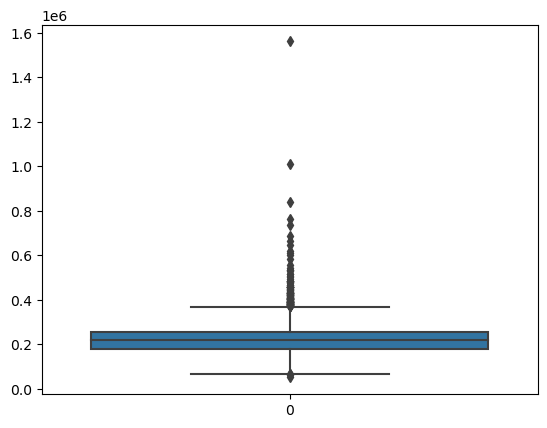

In [50]:
sns.boxplot(data["Song Length(ms)"])

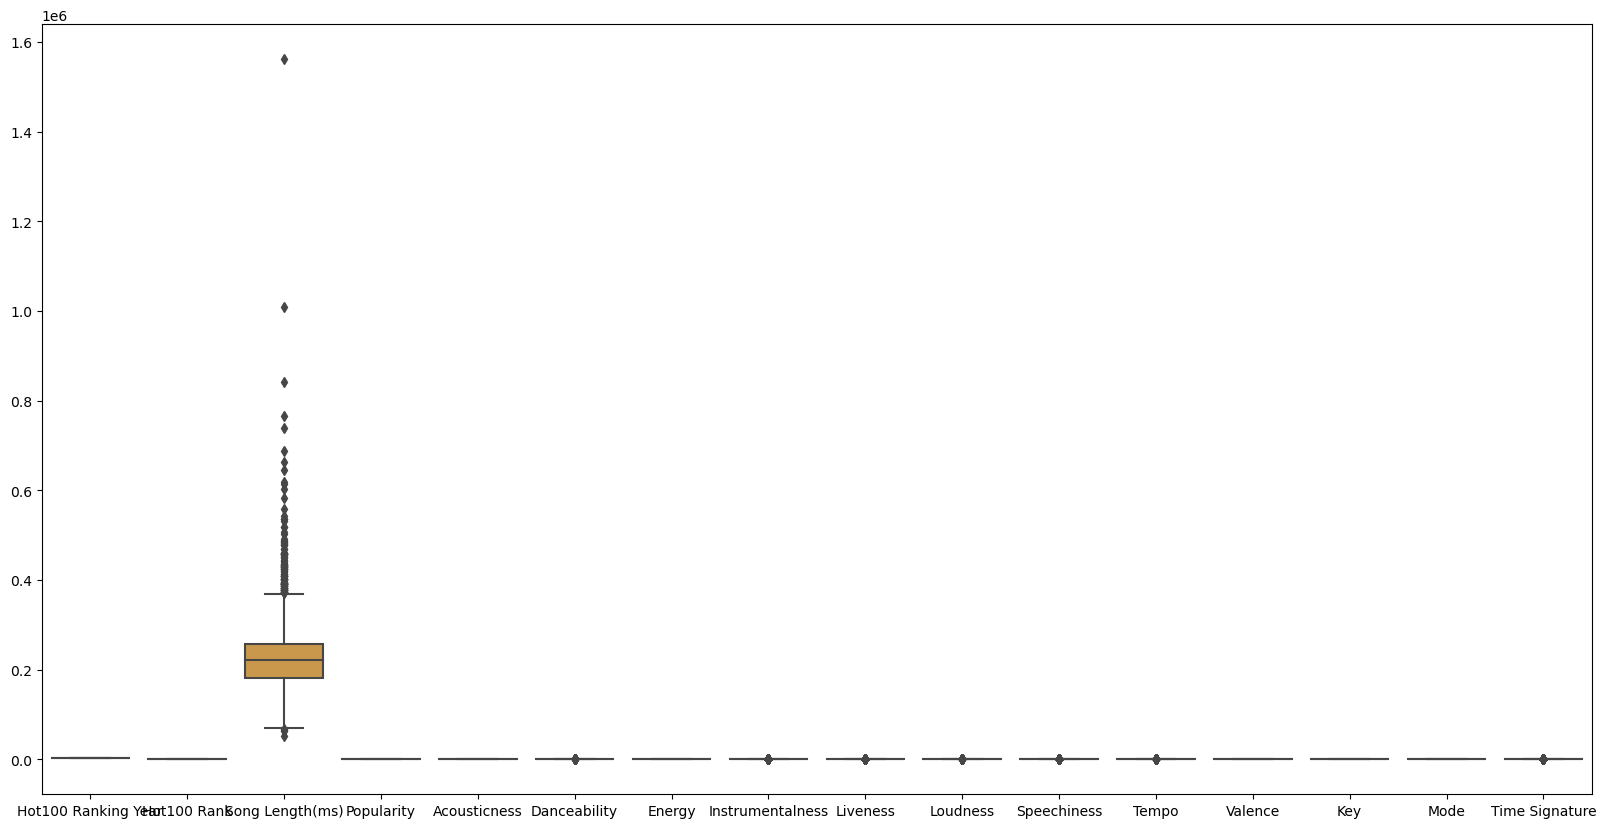

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(data)
plt.show()

<Axes: >

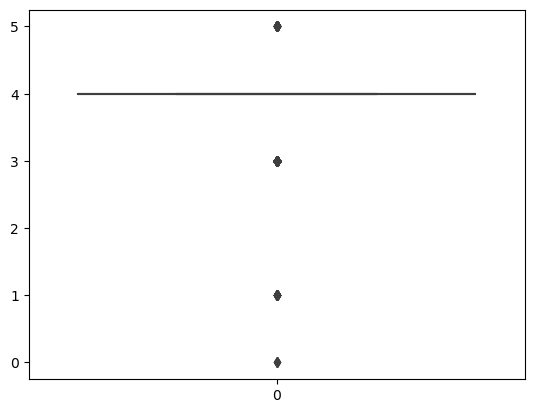

In [52]:
sns.boxplot(data= data["Time Signature"])

In [53]:
outliers_columns = categorical = [i for i in data.columns if data[i].dtypes != "O"]
for col in outliers_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    num_outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    print(f"{col},: {num_outliers}")

Hot100 Ranking Year,: 0
Hot100 Rank,: 0
Song Length(ms),: 117
Popularity,: 0
Acousticness,: 0
Danceability,: 41
Energy,: 0
Instrumentalness,: 1296
Liveness,: 348
Loudness,: 61
Speechiness,: 818
Tempo,: 89
Valence,: 0
Key,: 0
Mode,: 0
Time Signature,: 416


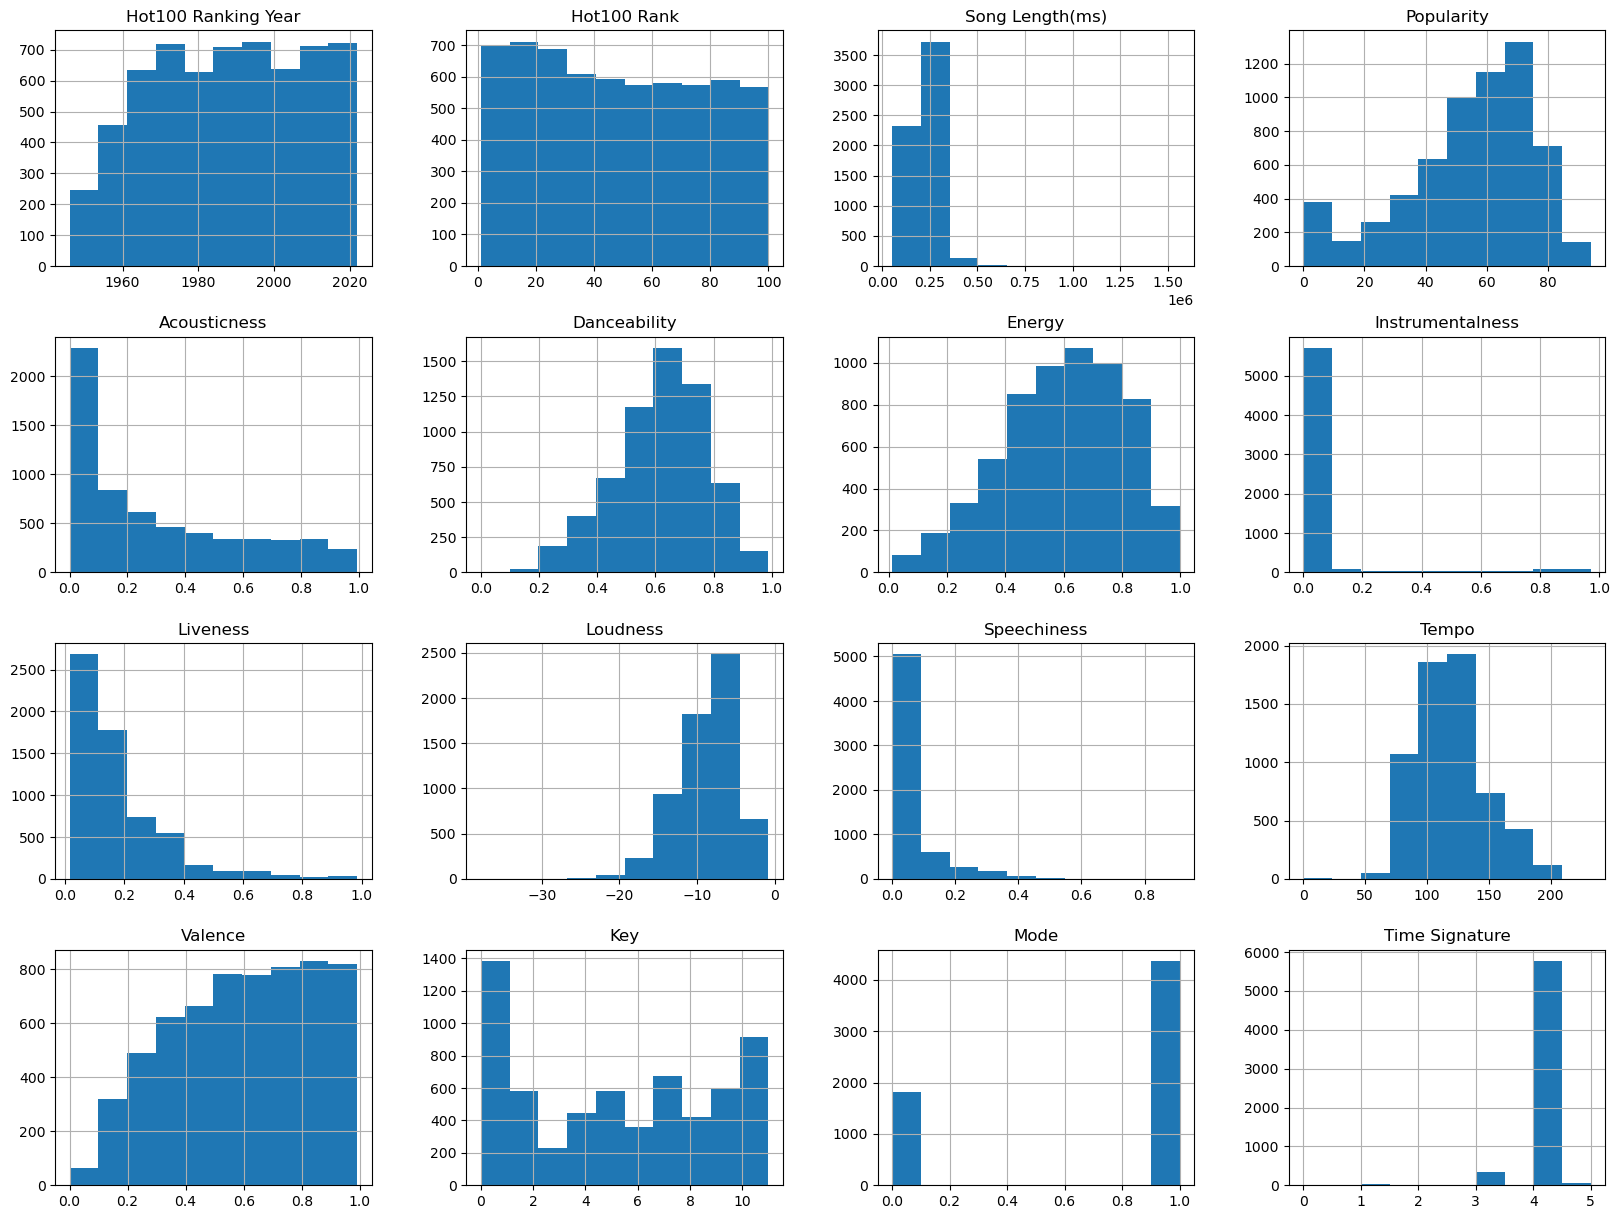

In [54]:
data.hist(figsize=(20,15))
plt.show()

#### We find from this graph:
* Song Length (ms): Most songs have a length that falls within a certain range, with a peak around 
200,000 to 300,000 milliseconds (or 3 to 5 minutes), which is typical for popular music tracks.
* Acousticness : The majority of songs have low acousticness, with a peak near 0.
* Danceability : The distribution is skewed towards higher danceability, with a peak around 
0.6 to 0.7 .This indicates that songs in the dataset are generally suitable for dancing.
* Energy : The distribution has a peak around 0.6 to 0.8, suggesting that many songs have a moderate to high level of energy.
* Instrumentalness : There is a high peak near 0, indicating that most songs have very low instrumentalness, which means they likely contain vocal content.
* Loudness : The distribution is skewed towards higher loudness levels, with most songs being around -5 to -10 dB. This reflects the modern trend of producing louder tracks.
* Speechiness : Most songs have low speechiness, with a peak near 0. This indicates that spoken words (e.g. talk show, audio book, poetry) are not a dominant feature.
* Tempo : The distribution shows a concentration of songs with tempos around 100 to 150 beats per minute (BPM), which is common for pop and dance music.
* Time Signature : The vast majority of songs have a 4/4 time signature, which is the most common time signature in Western music.

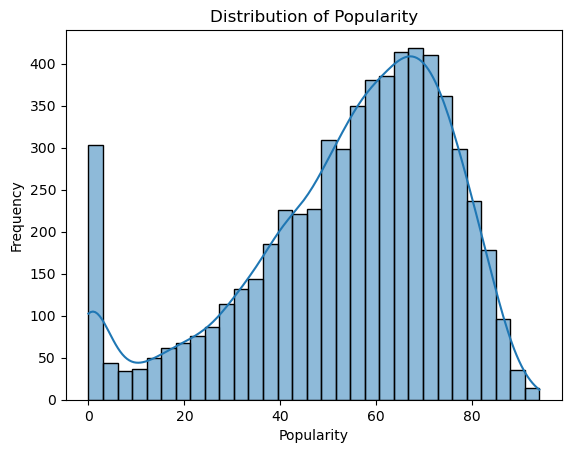

In [55]:
sns.histplot(data=data['Popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

* This graph shows that the song popularity is almost normal distribution, although there is a right-skewed distribution, indicating that fewer songs have very high popularity scores. This could suggest that only a small number of songs achieve extremely high popularity

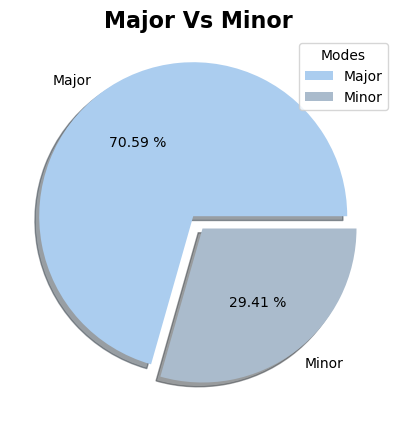

In [56]:
plt.figure(figsize=(5, 5))
Major = data.loc[data['Mode'] == 1].count()[0]
Minor = data.loc[data['Mode'] == 0].count()[0]

labels = ['Major', 'Minor']
colors = ['#abcdef', '#aabbcc']
explode = (0.1, 0)

plt.pie([Major, Minor], labels=labels, colors=colors, autopct='%.2f %%', shadow=True, explode=explode)
plt.title('Major Vs Minor ', fontsize=16, fontweight='bold')

plt.legend(title='Modes', loc='best')

plt.show()

#### We notice :
* There is a preference for songs in a major key (mode 1) over a minor key (mode 0), which is typical as major keys are often associated with happier, more upbeat music.

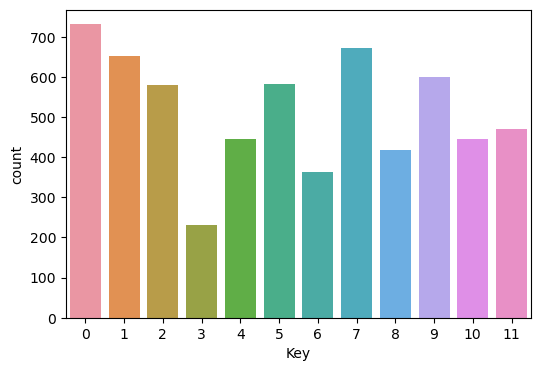

Key: 
 Key
0     731
7     671
1     653
9     600
5     583
2     580
11    470
4     446
10    445
8     419
6     362
3     231
Name: count, dtype: int64
None


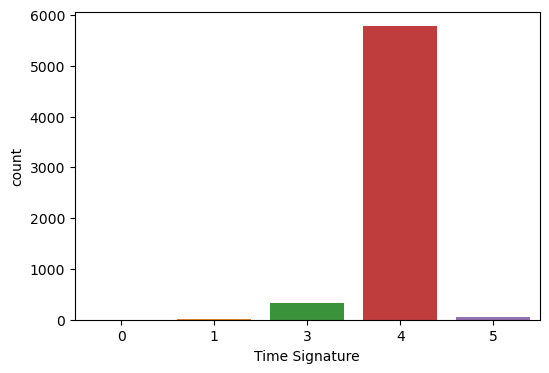

Time Signature: 
 Time Signature
4    5775
3     337
5      53
1      23
0       3
Name: count, dtype: int64
None


In [57]:
def plot(variable):

    var = data[variable]
    
    varValue = var.value_counts()

    plt.figure(figsize =(6,4))
    sns.countplot(data=data,x=variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

columns= ['Key', 'Time Signature']
for i in columns:
    print(plot(i))

Text(0.5, 1.0, 'Popularity Based on Key')

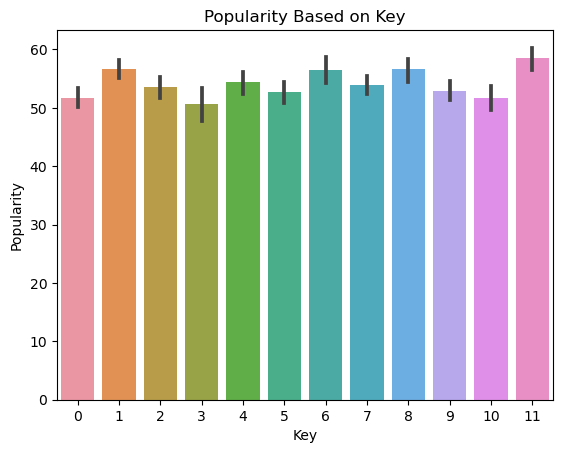

In [58]:
sns.barplot(x = 'Key', y = 'Popularity', data = data)
plt.title('Popularity Based on Key')

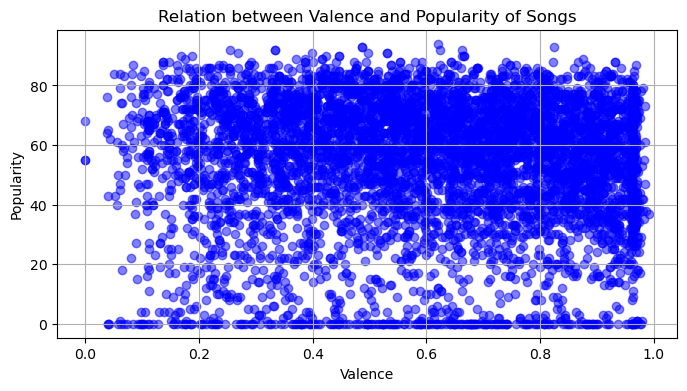

In [59]:
plt.figure(figsize=(8, 4))
plt.scatter(data['Valence'], data['Popularity'], alpha=0.5, color='b')
plt.title('Relation between Valence and Popularity of Songs')
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

#### We find from this graph:
* Concentration of blue dots in the upper right quadrant implys that songs with higher valence are more likely to be popular among listeners. On the other hand, songs with lower valence may have lower popularity.

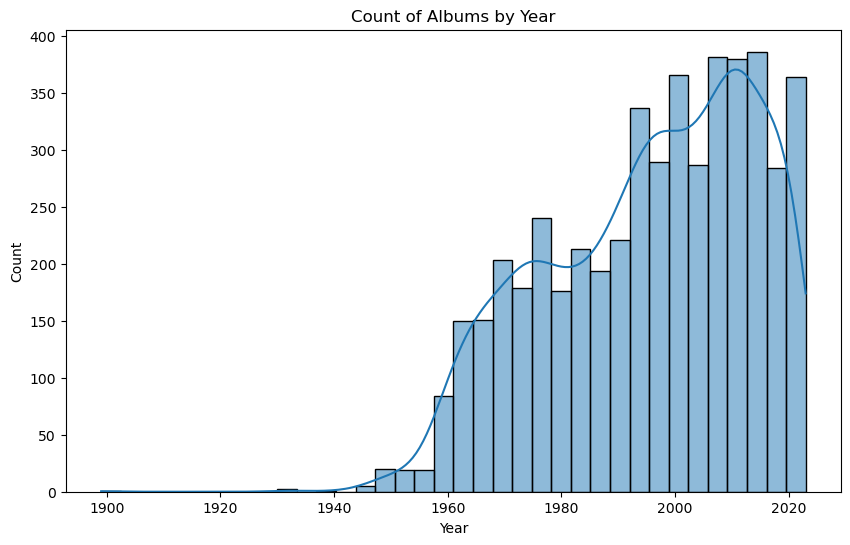

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(data=x_train['Release Year'], kde=True)
plt.title('Count of Albums by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks()
plt.yticks()
plt.show()

In [61]:
songs_per_album = data['Album'].value_counts().head(7)
songs_per_album_df = songs_per_album.reset_index()
songs_per_album_df.columns = ['album', 'count']
songs_per_album_df

,album,count
0,Greatest Hits,48
1,Super Hits,13
2,16 Most Requested Songs,10
3,The Definitive Collection,10
4,Celebration (double disc version),9
5,Golden Hits,8
6,Love Songs,8


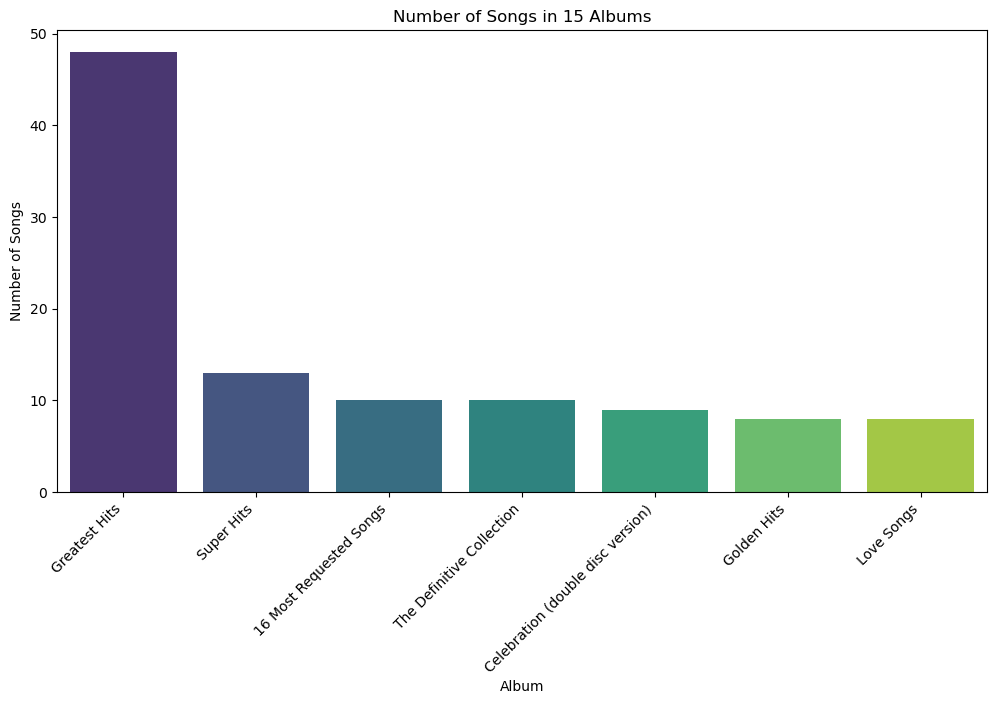

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x='album', y='count', data=songs_per_album_df, palette='viridis')
plt.xlabel('Album')
plt.ylabel('Number of Songs')
plt.title('Number of Songs in 15 Albums')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [63]:
data.columns

Index(['Song', 'Album', 'Album Release Date', 'Artist Names',
       'Artist(s) Genres', 'Hot100 Ranking Year', 'Hot100 Rank',
       'Song Length(ms)', 'Spotify Link', 'Song Image', 'Spotify URI',
       'Popularity', 'Acousticness', 'Danceability', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo',
       'Valence', 'Key', 'Mode', 'Time Signature'],
      dtype='object')

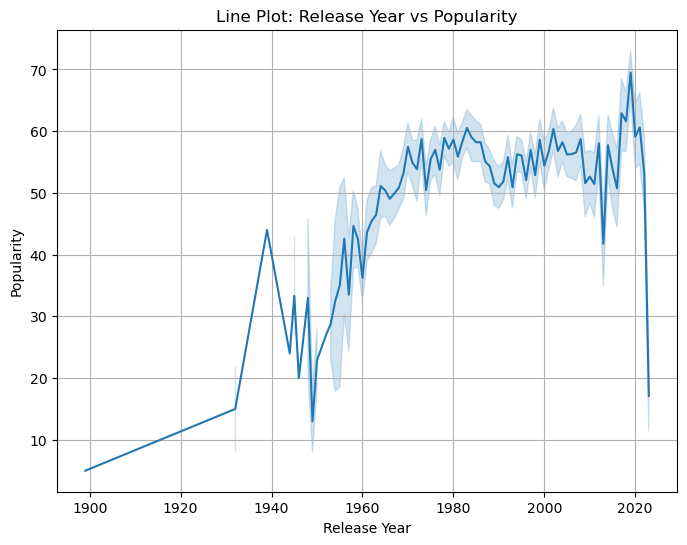

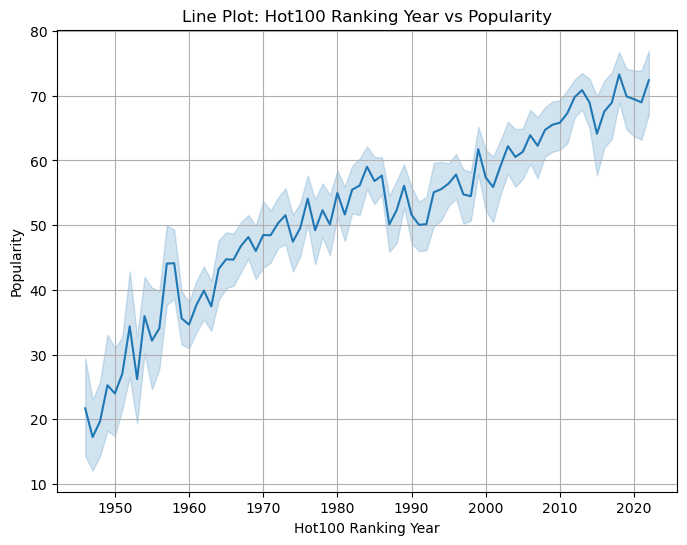

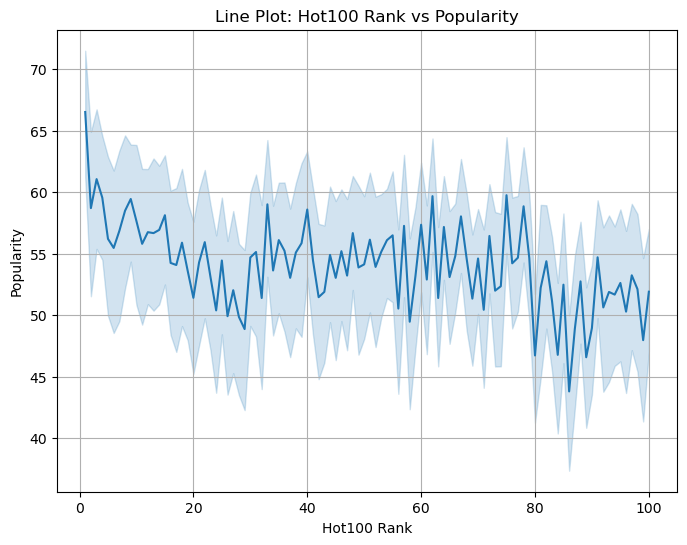

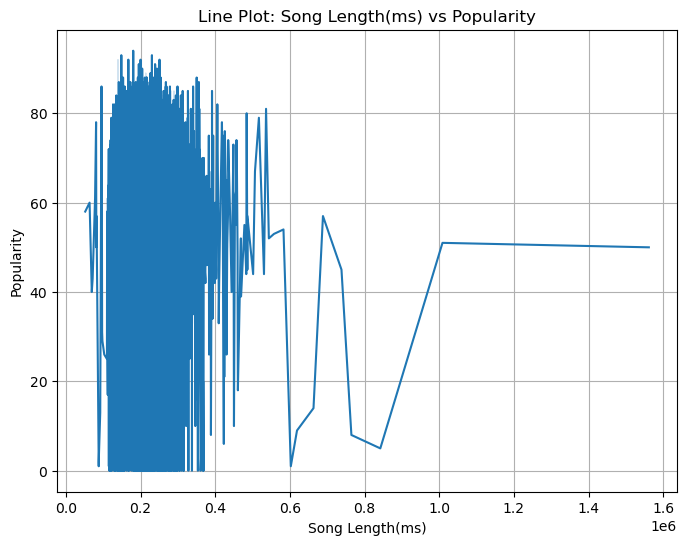

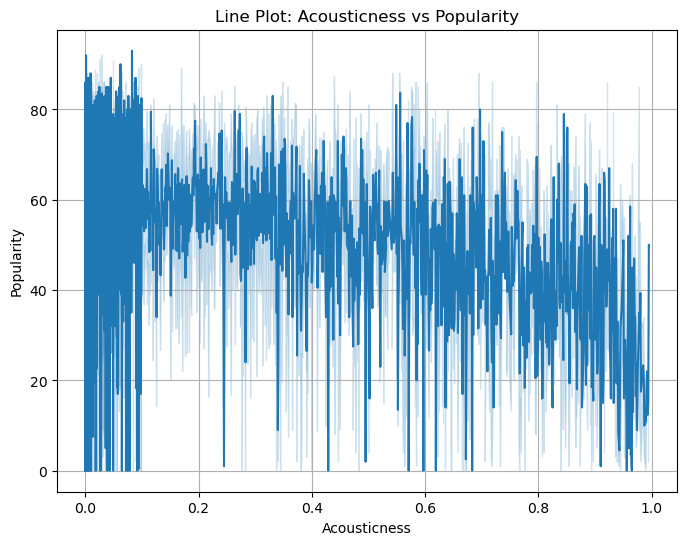

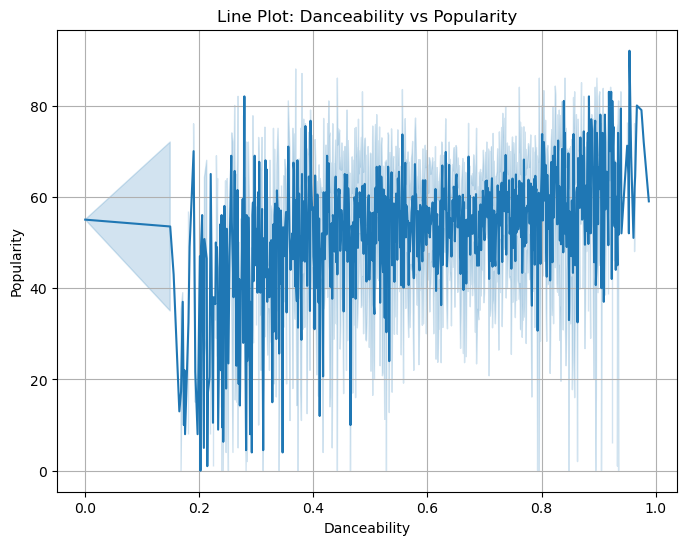

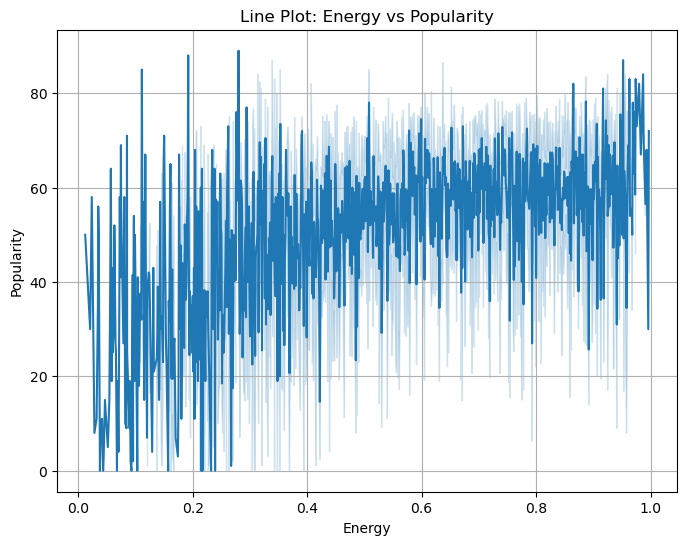

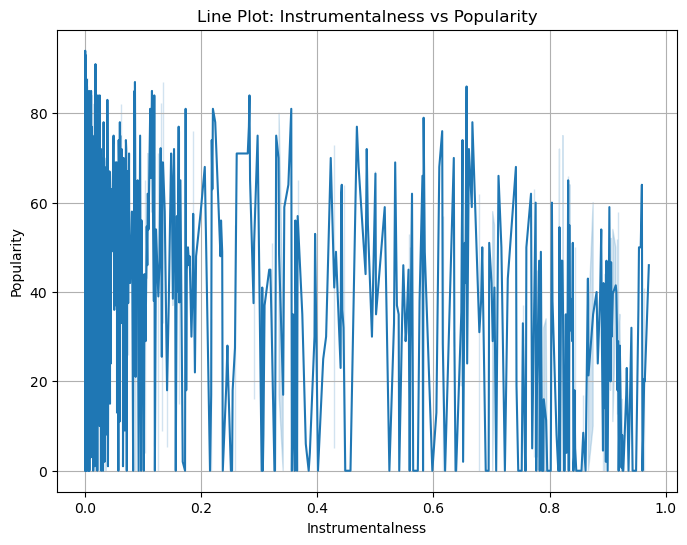

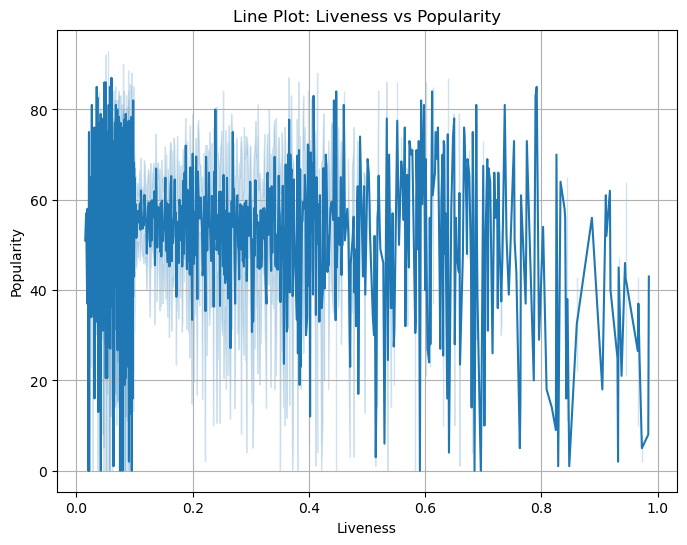

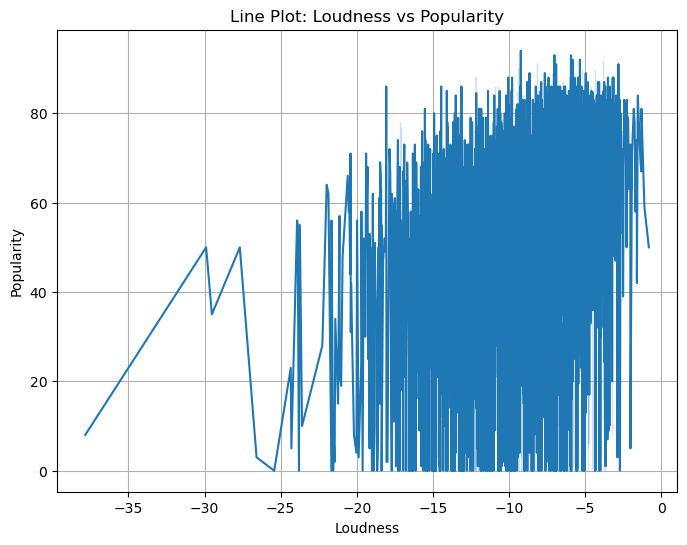

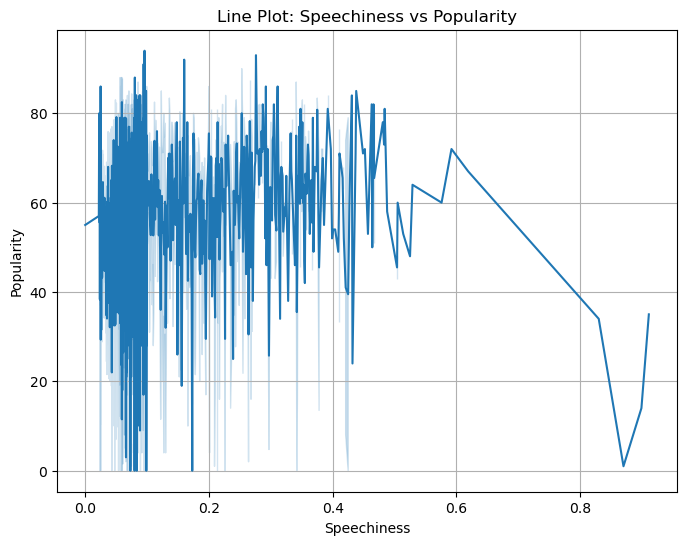

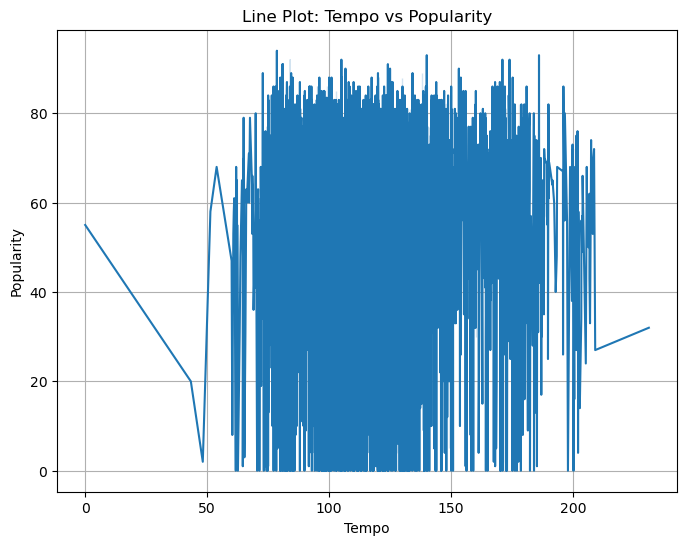

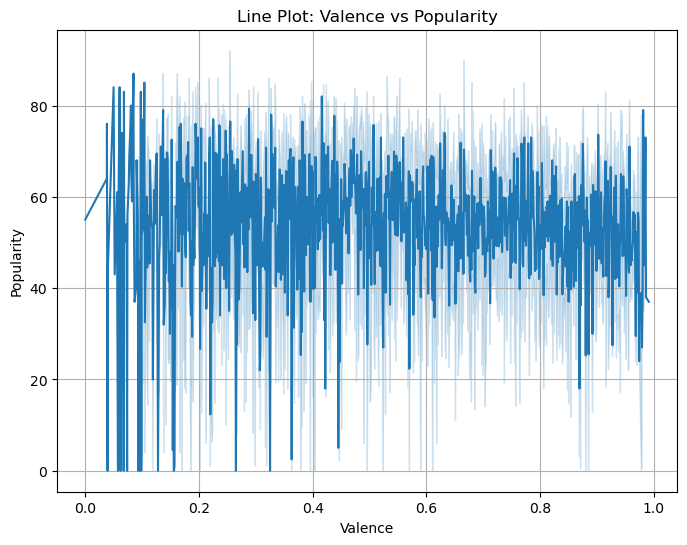

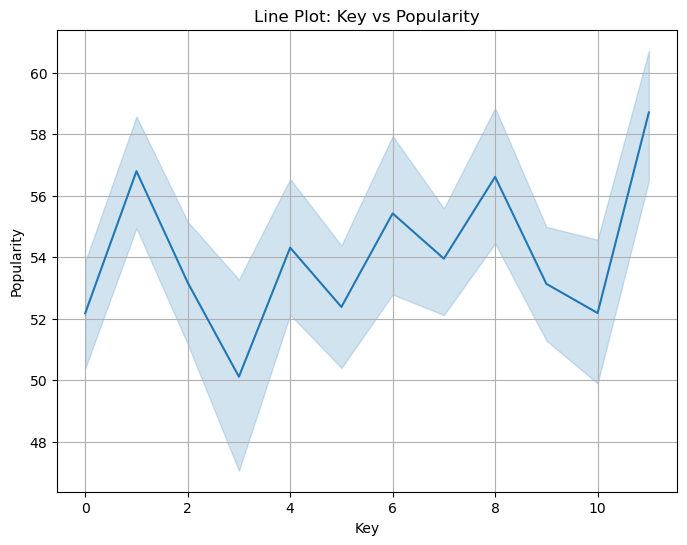

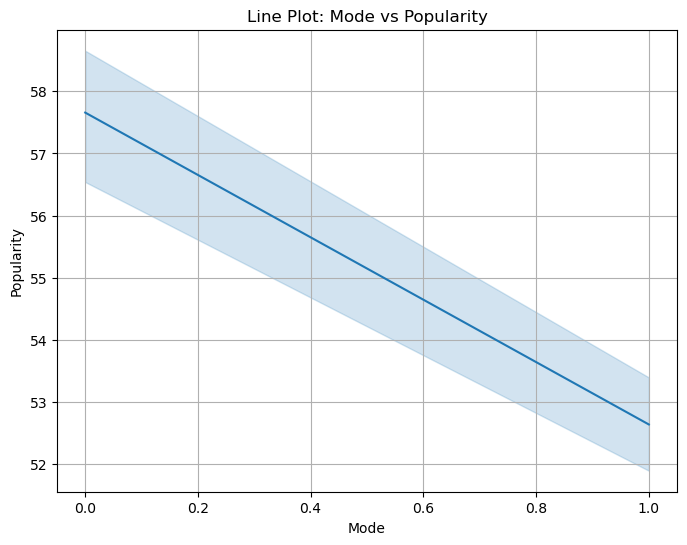

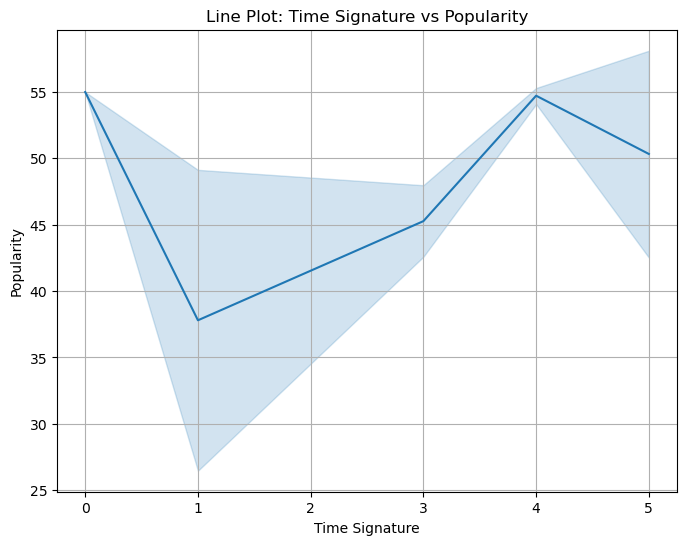

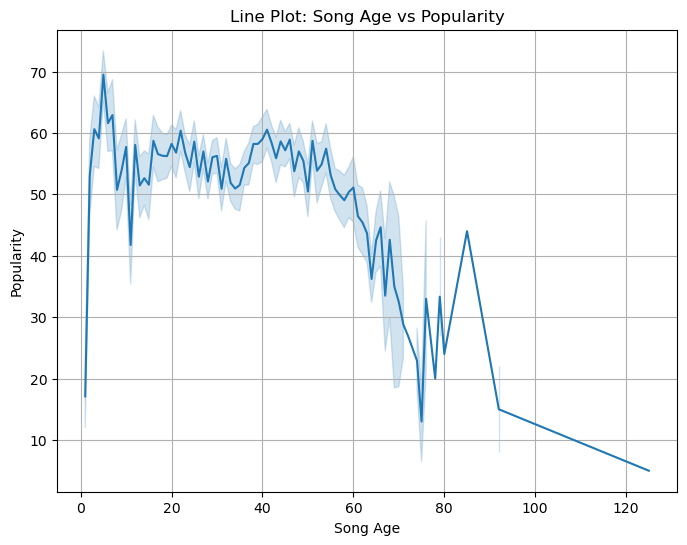

In [64]:
for column in x_train.select_dtypes(include='number').columns:
    # Plot line plot for each numeric feature against 'Popularity'
    plt.figure(figsize=(8, 6))
    sns.lineplot(x= x_train[column], y= data['Popularity'])
    plt.xlabel(column)
    plt.ylabel('Popularity')
    plt.title(f'Line Plot: {column} vs Popularity')
    plt.grid(True)
    plt.show()


In [65]:
# Drop useless columns
x_train.drop(['Song','Spotify Link','Spotify URI','Artist(s) Genres',
           'Album', 'Song Image'], inplace=True,axis=1)

In [66]:
x_train.columns

Index(['Release Year', 'Hot100 Ranking Year', 'Hot100 Rank', 'Song Length(ms)',
       'Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
       'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence', 'Key',
       'Mode', 'Time Signature', 'ArtistCount', 'Genre', 'Song Age'],
      dtype='object')

## Encoding

In [67]:


categorical = [i for i in x_train.columns if x_train[i].dtypes == "O"]


for col in categorical:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])

In [68]:
x_train.head()

,Release Year,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,ArtistCount,Genre,Song Age
1020,2009,1990,5,316813,0.00379,0.737,0.880,0.003510,0.4170,-6.449,0.0433,115.998,0.329,6,1,4,2,4,15
1545,2012,2012,100,230253,0.01430,0.585,0.972,0.000000,0.0707,-4.450,0.0534,110.006,0.585,9,0,4,2,3,12
1433,2008,2009,40,249533,0.01610,0.680,0.687,0.000000,0.2610,-6.162,0.0709,150.053,0.467,9,0,4,2,4,16
5669,2012,1987,59,247360,0.00462,0.787,0.889,0.423000,0.0665,-3.786,0.0397,114.091,0.394,8,1,4,2,3,12
737,2012,1963,92,134066,0.20500,0.401,0.913,0.000459,0.1400,-2.755,0.1700,130.326,0.662,6,1,4,2,3,12


In [69]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4952 entries, 1020 to 860
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release Year         4952 non-null   int64  
 1   Hot100 Ranking Year  4952 non-null   int64  
 2   Hot100 Rank          4952 non-null   int64  
 3   Song Length(ms)      4952 non-null   int64  
 4   Acousticness         4952 non-null   float64
 5   Danceability         4952 non-null   float64
 6   Energy               4952 non-null   float64
 7   Instrumentalness     4952 non-null   float64
 8   Liveness             4952 non-null   float64
 9   Loudness             4952 non-null   float64
 10  Speechiness          4952 non-null   float64
 11  Tempo                4952 non-null   float64
 12  Valence              4952 non-null   float64
 13  Key                  4952 non-null   int64  
 14  Mode                 4952 non-null   int64  
 15  Time Signature       4952 non-null   int6

<Axes: >

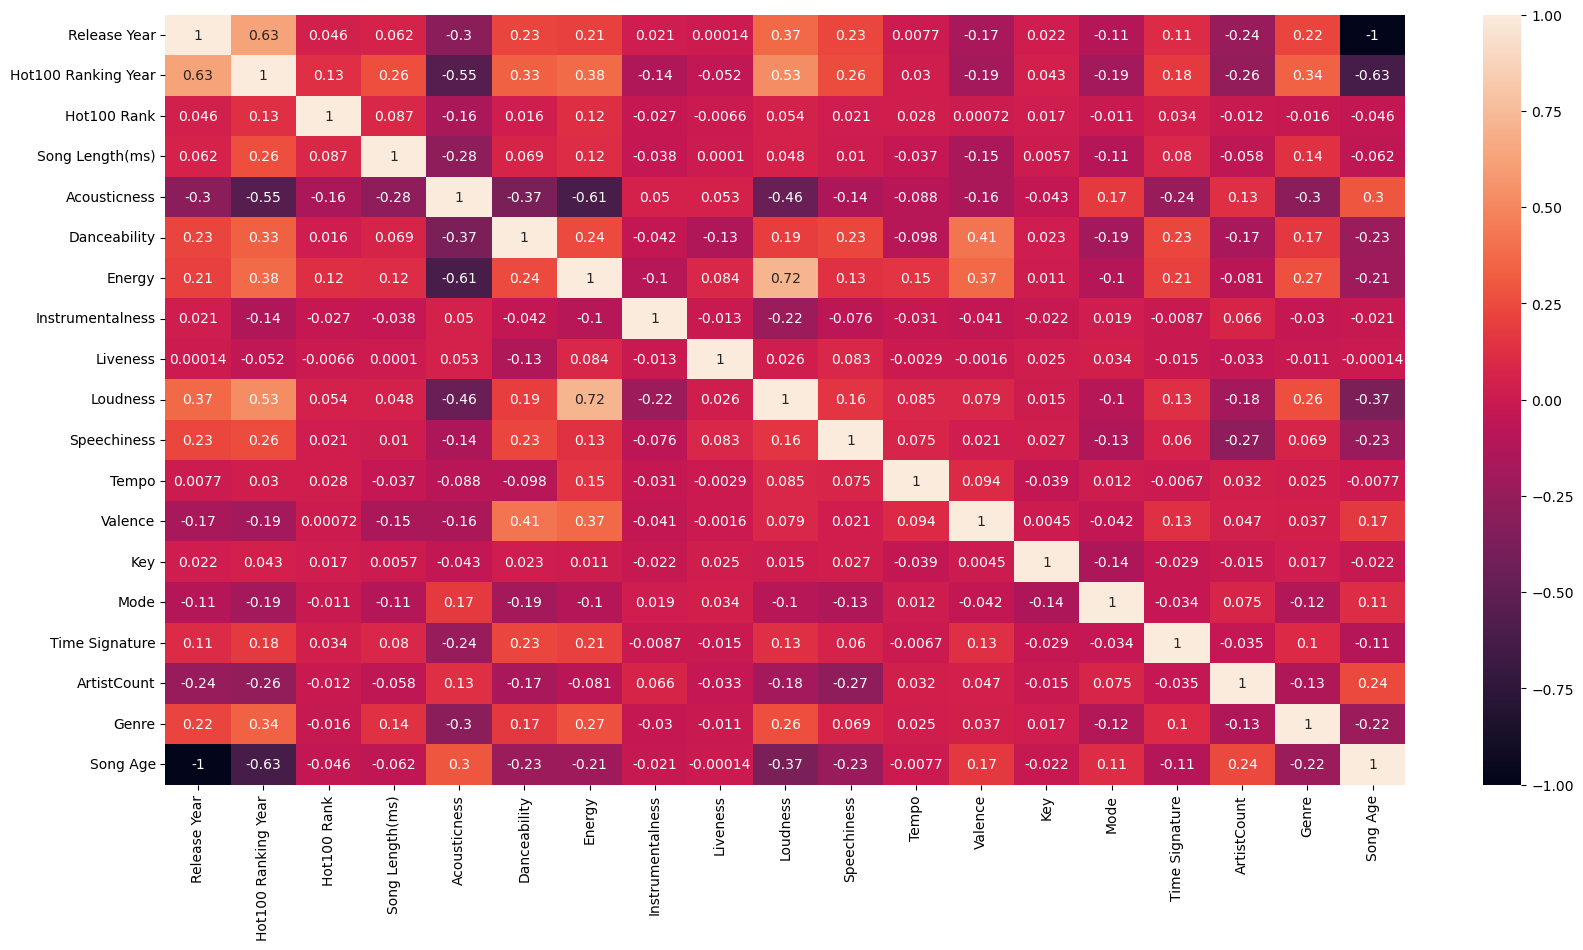

In [70]:
corr_matrix = x_train.corr()
plt.figure(figsize = (20 , 10))
sns.heatmap(corr_matrix,annot= True)

## Feature Selection

In [71]:
k= 17
selected_feature= x_train.columns[SelectKBest(f_regression, k=k).fit(x_train,y_train).get_support()]
print(selected_feature)

Index(['Release Year', 'Hot100 Ranking Year', 'Hot100 Rank', 'Song Length(ms)',
       'Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
       'Liveness', 'Loudness', 'Speechiness', 'Valence', 'Mode',
       'Time Signature', 'ArtistCount', 'Genre', 'Song Age'],
      dtype='object')


In [72]:
selected_x = x_train[['Release Year', 'Hot100 Ranking Year', 'Hot100 Rank', 'Song Length(ms)',
       'Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
       'Liveness', 'Loudness', 'Speechiness', 'Valence', 'Mode',
       'Time Signature', 'ArtistCount', 'Genre', 'Song Age']]

X_selected = pd.DataFrame(data= selected_x)

In [73]:
X_selected.head()

,Release Year,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Mode,Time Signature,ArtistCount,Genre,Song Age
1020,2009,1990,5,316813,0.00379,0.737,0.880,0.003510,0.4170,-6.449,0.0433,0.329,1,4,2,4,15
1545,2012,2012,100,230253,0.01430,0.585,0.972,0.000000,0.0707,-4.450,0.0534,0.585,0,4,2,3,12
1433,2008,2009,40,249533,0.01610,0.680,0.687,0.000000,0.2610,-6.162,0.0709,0.467,0,4,2,4,16
5669,2012,1987,59,247360,0.00462,0.787,0.889,0.423000,0.0665,-3.786,0.0397,0.394,1,4,2,3,12
737,2012,1963,92,134066,0.20500,0.401,0.913,0.000459,0.1400,-2.755,0.1700,0.662,1,4,2,3,12


## Normalization

In [74]:
normalize = MinMaxScaler()
df= normalize.fit_transform(X_selected)
Nor_x= pd.DataFrame(df, columns= X_selected.columns)


In [75]:
Nor_x.head()

,Release Year,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Mode,Time Signature,ArtistCount,Genre,Song Age
0,0.887097,0.578947,0.040404,0.175583,0.003805,0.745951,0.881218,0.003615,0.414433,0.847722,0.047530,0.331988,1.0,0.8,1.0,1.00,0.112903
1,0.911290,0.868421,1.000000,0.118233,0.014368,0.592105,0.974619,0.000000,0.057423,0.901704,0.058617,0.590313,0.0,0.8,1.0,0.75,0.088710
2,0.879032,0.828947,0.393939,0.131007,0.016177,0.688259,0.685279,0.000000,0.253608,0.855472,0.077827,0.471241,0.0,0.8,1.0,1.00,0.120968
3,0.911290,0.539474,0.585859,0.129567,0.004640,0.796559,0.890355,0.435633,0.053093,0.919635,0.043578,0.397578,1.0,0.8,1.0,0.75,0.088710
4,0.911290,0.223684,0.919192,0.054505,0.206027,0.405870,0.914721,0.000473,0.128866,0.947476,0.186608,0.668012,1.0,0.8,1.0,0.75,0.088710


In [76]:
def model_val2(model, x_train, y_train):
    
    model.fit(x_train, y_train)

    ytrainpred = model.predict(x_train)
    
    
    msetrain = mean_squared_error(y_train, ytrainpred)
    print(f" mean squared error (MSE) for train: {msetrain}")
    rmsetrain = np.sqrt(msetrain)
    print(f" root mean squared error (RMSE) for train: {rmsetrain}")

    rscore = r2_score(y_train, ytrainpred)
    print(f"R2 Score for test: {rscore} ")

## Linear regression

In [77]:
LR_model = LinearRegression()
model_val2(LR_model,Nor_x,y_train)

 mean squared error (MSE) for train: 267.8380664831602
 root mean squared error (RMSE) for train: 16.365758964470917
R2 Score for test: 0.41793079445121484 


## XGboost

In [78]:

XG_model = XGBRegressor(n_estimators=1000, max_depth=3, learning_rate=0.01)
model_val2(XG_model,Nor_x,y_train)

 mean squared error (MSE) for train: 171.47988534599995
 root mean squared error (RMSE) for train: 13.095032850130615
R2 Score for test: 0.6273376598721134 


### Grid Search

In [79]:

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.03, 0.06, 0.09],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize XGBoost regressor
xgb_model = XGBRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Using negative mean squared error as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print detailed information
)


grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


best_model.fit(x_train, y_train)


y_pred_best = best_model.predict(x_train)
mse_best = mean_squared_error(y_train, y_pred_best)
best_r2 = r2_score(y_train, y_pred_best)

print("Best hyperparameters:", best_params)
print("Final model MSE with best hyperparameters:", mse_best)
print("Final R2 Score:", best_r2)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters: {'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 200}
Final model MSE with best hyperparameters: 69.40961630934282
Final R2 Score: 0.8491581097746413


## Polynomial regression

In [80]:
poly_reg = PolynomialFeatures(degree=2)
x_train_poly = poly_reg.fit_transform(Nor_x)
lin_reg2 = LinearRegression()
model_val2(lin_reg2,x_train_poly,y_train)

 mean squared error (MSE) for train: 225.21317242497582
 root mean squared error (RMSE) for train: 15.007104065241096
R2 Score for test: 0.5105637743215666 


## SVR

In [81]:
svr_model = SVR(kernel= 'poly', degree= 3)

model_val2(svr_model,Nor_x,y_train)

 mean squared error (MSE) for train: 251.8539907029286
 root mean squared error (RMSE) for train: 15.869908339462096
R2 Score for test: 0.4526675979720689 


## Linear SVR

In [82]:
lsvr_model = LinearSVR(loss ='squared_epsilon_insensitive')
model_val2(lsvr_model,Nor_x,y_train)

 mean squared error (MSE) for train: 267.87027648618545
 root mean squared error (RMSE) for train: 16.366743001776054
R2 Score for test: 0.4178607952493919 


c:\Users\yassi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


## Lasso regression

In [83]:
lasso_model = Lasso(alpha= 0.01)
model_val2(lasso_model ,Nor_x,y_train)

 mean squared error (MSE) for train: 268.00447525620876
 root mean squared error (RMSE) for train: 16.370842228065385
R2 Score for test: 0.41756915271896766 


## Ridge regression

In [84]:
ridge_model = Ridge()
model_val2(ridge_model ,Nor_x,y_train)

 mean squared error (MSE) for train: 267.88101419583535
 root mean squared error (RMSE) for train: 16.367071032895144
R2 Score for test: 0.4178374599176843 


## Gradient boost

In [85]:
gb_model = GradientBoostingRegressor(learning_rate= 0.03, n_estimators= 200, max_depth= 5, min_samples_split= 5)

model_val2(gb_model ,Nor_x,y_train)

 mean squared error (MSE) for train: 127.38534171409731
 root mean squared error (RMSE) for train: 11.286511494438718
R2 Score for test: 0.7231645015076787 


### Random search

In [ ]:
import random


# Define the parameter grid for Gradient Boosting Regressor
param_grid = {
    'learning_rate': [0.01, 0.03, 0.06,0.09],  # Different learning rates to try
    'n_estimators': [100, 200, 300],    # Number of trees in the forest
    'max_depth': [3, 5, 7],             # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]     # Minimum number of samples required to split an internal node
}

num_iterations = 10
best_mse = float('inf')
best_params = {}

for _ in range(num_iterations):
    params = {
        'learning_rate': random.choice(param_grid['learning_rate']),
        'n_estimators': random.choice(param_grid['n_estimators']),
        'max_depth': random.choice(param_grid['max_depth']),
        'min_samples_split': random.choice(param_grid['min_samples_split'])
    }

    model = GradientBoostingRegressor(**params)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if mse < best_mse:
        best_mse = mse
        best_params = params

best_model = GradientBoostingRegressor(**best_params)
best_model.fit(x_train, y_train)
y_pred_best = best_model.predict(x_test)
mse_best = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print("Best hyperparameters:", best_params)
print("Final model MSE with best hyperparameters:", mse_best)
print("Final R2 Score : ", best_r2)

Best hyperparameters: {'learning_rate': 0.03, 'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 5}
Final model MSE with best hyperparameters: 180.97911517353103
Final R2 Score :  0.6097086999828923


In [ ]:

model = GradientBoostingRegressor(learning_rate= 0.03, n_estimators= 200, max_depth= 5, min_samples_split= 5)


train_rmse = []
test_rmse = []


for i in range(1, 401):  
    model.fit(x_train[:i], y_train[:i])  
    y_train_pred = model.predict(x_train[:i])
    y_test_pred = model.predict(x_test)
    train_rmse.append(np.sqrt(mean_squared_error(y_train[:i], y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))


# Plotting the RMSE values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 401), train_rmse, label='Train RMSE')
plt.plot(range(1, 401), test_rmse, label='Test RMSE')
plt.xlabel('Number of Iterations')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Training and Testing RMSE vs. Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Saving Models

In [87]:
import pickle 

# Encoding Model

pickle.dump(le,open("Models/Encoding model.pkl", "wb") )


In [88]:
# Scaling Model

pickle.dump(normalize,open("Models/Normalization model.pkl", "wb") )


In [89]:
# Machine learning models



pickle.dump(gb_model,open("Models/GB model.pkl", "wb") )

pickle.dump(XG_model,open("Models/XGBoost.pkl", "wb") )



# Testing

In [86]:
x_test['Album Release Date'] = x_test['Album Release Date'].apply(extract_year)


x_test['Album Release Date'] = x_test['Album Release Date'].fillna(x_test['Album Release Date'].loc[x_test['Album Release Date'].notna()].astype(str))

x_test.rename(columns={'Album Release Date': 'Release Year'}, inplace=True)


# Apply categorization function to create a new column
x_test['ArtistCount'] = x_test['Artist Names'].apply(lambda x: categorize_names(eval(x)))

# Apply categorization function to create a new column
x_test['Genre'] = x_test['Artist(s) Genres'].apply(lambda x: categorize_genres(eval(x)))

In [91]:
current_year = datetime.datetime.now().year

# Calculate the age of the song
x_test['Song Age'] = current_year - x_test['Release Year']

In [92]:
x_test.drop(['Song','Album','Artist(s) Genres','Spotify Link', 'Song Image','Spotify URI', 'Artist Names'], axis = 1 , inplace = True)

In [100]:
encoding_model = pickle.load(open("Models/Encoding model.pkl", "rb"))

normalization_model = pickle.load(open("Models/Normalization model.pkl", "rb"))

GB_model = pickle.load(open("Models/GB model.pkl", "rb"))

XG_model = pickle.load(open("Models\XGBoost.pkl", "rb"))




In [94]:
categorical_columns = [i for i in x_test.columns if x_test[i].dtype == "O"]

for col in categorical_columns:
     x_test[col] = x_test[col].apply(lambda x: encoding_model.transform([x])[0] if x in encoding_model.classes_ else -1)

In [95]:
x_test

,Release Year,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature,ArtistCount,Genre,Song Age
996,1978,1979,31,346133,0.415000,0.863,0.726,0.029900,0.0735,-6.649,0.0494,132.574,0.930,9,1,4,-1,3,46
468,1987,1987,4,291293,0.207000,0.709,0.824,0.000307,0.0888,-8.824,0.0453,118.818,0.867,1,1,4,-1,4,37
6077,2006,2006,65,207586,0.025900,0.792,0.589,0.000128,0.1140,-6.869,0.2620,157.147,0.778,4,0,4,-1,3,18
2127,1982,1982,76,308200,0.138000,0.667,0.363,0.000007,0.4100,-13.498,0.0275,109.208,0.224,4,1,4,-1,3,42
2080,1969,1969,98,147760,0.195000,0.749,0.530,0.000035,0.0748,-12.940,0.0326,121.395,0.966,9,1,4,-1,4,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,1983,1983,64,225840,0.102000,0.746,0.895,0.000242,0.0594,-5.381,0.0658,115.693,0.753,5,1,4,-1,4,41
71,2010,2010,80,249546,0.043000,0.592,0.944,0.000000,0.3650,-2.940,0.1110,124.420,0.574,7,1,5,-1,4,14
5027,1958,1963,37,127093,0.946000,0.176,0.204,0.000000,0.1650,-11.643,0.0294,82.360,0.123,2,0,4,-1,0,66
711,2000,2001,12,227600,0.056100,0.853,0.606,0.000000,0.3130,-4.596,0.0713,94.759,0.654,0,1,4,-1,4,24


In [96]:
selected_x = x_test[['Release Year', 'Hot100 Ranking Year', 'Hot100 Rank', 'Song Length(ms)',
       'Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
       'Liveness', 'Loudness', 'Speechiness', 'Valence', 'Mode',
       'Time Signature', 'ArtistCount', 'Genre', 'Song Age']]

X_selected = pd.DataFrame(data= selected_x)

In [97]:
df= normalization_model.transform(X_selected)
x_test= pd.DataFrame(df, columns= X_selected.columns)

In [98]:
y_pred = GB_model.predict(x_test)

   
mse = mean_squared_error(y_test, y_pred)
print(f" mean squared error (MSE) for train: {mse}")
rmse = np.sqrt(mse)
print(f" root mean squared error (RMSE) for train: {rmse}")

rscore = r2_score(y_test, y_pred)
print(f"R2 Score for test: {rscore} ")

 mean squared error (MSE) for train: 188.8600003047173
 root mean squared error (RMSE) for train: 13.742634401915714
R2 Score for test: 0.6004747944251011 


In [105]:
y_pred = XG_model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print(f" mean squared error (MSE) for train: {mse}")
rmse = np.sqrt(mse)
print(f" root mean squared error (RMSE) for train: {rmse}")

rscore = r2_score(y_test, y_pred)
print(f"R2 Score for test: {rscore} ")

 mean squared error (MSE) for train: 199.45291005873264
 root mean squared error (RMSE) for train: 14.122779827595297
R2 Score for test: 0.5780659495649879 
